Detect cat in the sentence

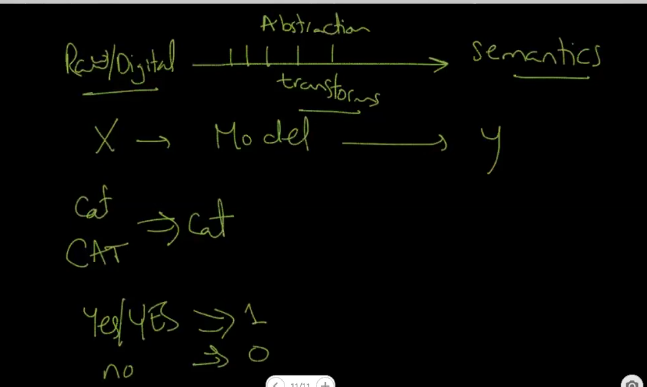

In [ ]:
def detect_cat(sent):
  return #?

In [ ]:
def is_cat(word):
  return word=='cat'

In [ ]:
is_cat('cat')

True

In [ ]:
is_cat('Cat')

False

Different morphologies could be handled in many ways:

In [ ]:
def is_cat(word):
  return word in {'cat', 'Cat', 'CAT', 'cAT', 'Kitten'}

In [ ]:
is_cat('Cat')

True

Get 'invariant' feature!

In [ ]:
def is_cat(word):
  return word.lower() == 'cat'

In [ ]:
is_cat('Cat')

True

In [ ]:
is_cat('Kitten')

False

In [ ]:
def detect_cats(sent):
  cats = []
  for word in sent.split():
    cats.append(is_cat(word))
  return cats


In [ ]:
sent = 'The cat sat on the mat'
detect_cats(sent)

[None, None, None, None, None, None]

In [ ]:
def is_cat(img):
  return #?

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg -O cat.jpg


--2025-03-10 21:19:43--  https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279603 (273K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 273.05K  --.-KB/s    in 0.07s   

2025-03-10 21:19:43 (3.69 MB/s) - ‘cat.jpg’ saved [279603/279603]



In [ ]:
import cv2
img = cv2.imread('cat.jpg')


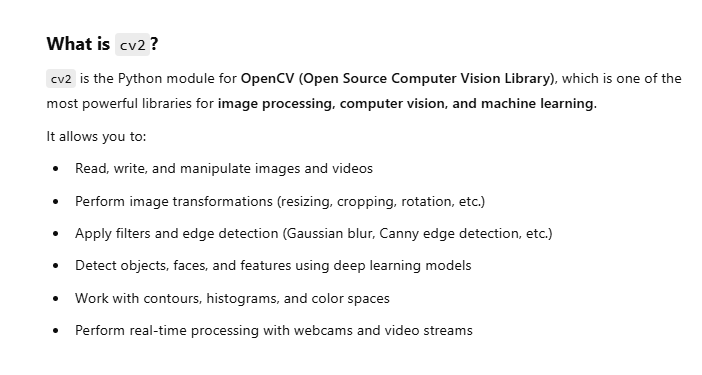

In [ ]:
img.shape

(1598, 1600, 3)

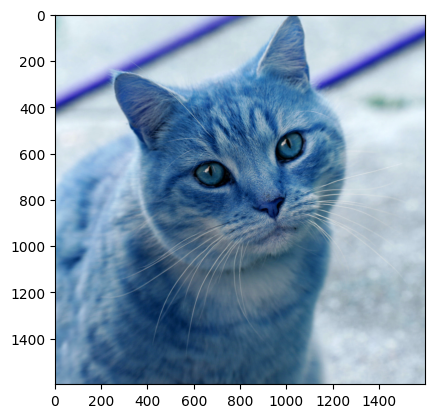

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

The reason the above image is not well color mapped is that cv2 imread normally uses BGR, while plt.imshow directly uses RGB. So we need to map:

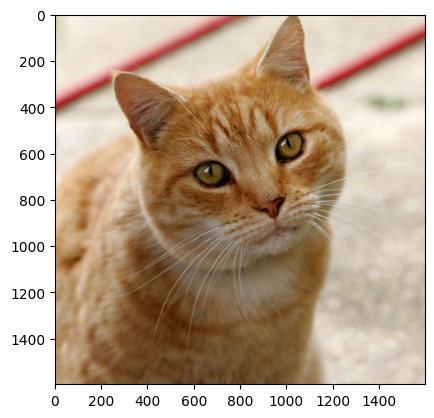

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

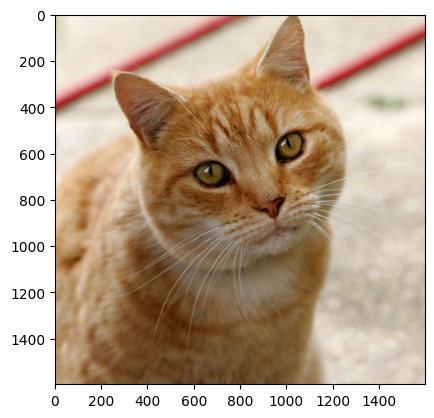

In [ ]:
img_bgr = cv2.imread('cat.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Another solution is to use PIL, either through Keras or from PIL directly

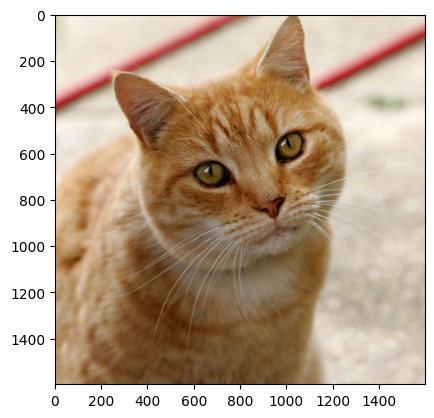

In [ ]:
from keras.preprocessing import image
img = image.load_img('cat.jpg')
plt.imshow(img)

In [ ]:
img #PIL image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Repeat with PIL
from PIL import Image
img = Image.open('cat.jpg')
img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np

img_tensor = np.array(img)

In [ ]:
img_tensor.shape

(1598, 1600, 3)

In [ ]:
img_tensor = image.img_to_array(img)
img_tensor

array([[[217., 208., 177.],
        [217., 208., 177.],
        [216., 207., 176.],
        ...,
        [231., 221., 212.],
        [231., 221., 212.],
        [231., 221., 212.]],

       [[217., 208., 177.],
        [217., 208., 177.],
        [216., 207., 176.],
        ...,
        [231., 221., 211.],
        [231., 221., 211.],
        [231., 221., 211.]],

       [[217., 208., 177.],
        [217., 208., 177.],
        [216., 207., 176.],
        ...,
        [232., 222., 212.],
        [232., 222., 212.],
        [232., 222., 212.]],

       ...,

       [[183., 150., 117.],
        [184., 151., 118.],
        [184., 151., 118.],
        ...,
        [226., 214., 198.],
        [225., 213., 197.],
        [225., 213., 197.]],

       [[183., 150., 117.],
        [184., 151., 118.],
        [184., 151., 118.],
        ...,
        [226., 214., 198.],
        [225., 213., 197.],
        [225., 213., 197.]],

       [[184., 151., 118.],
        [184., 151., 118.],
        [185., 1

In [ ]:
ref_img = img_tensor
def is_cat(cat_img):
  return np.all((cat_img == ref_img))


In [ ]:
is_cat(img_tensor)

True

In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw&s

/bin/bash: line 1: s: command not found
--2025-03-10 21:44:51--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.250.101.100, 142.250.101.113, 142.250.101.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6844 (6.7K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw.3’

images?q=tbn:ANd9Gc 100%[===================>]   6.68K  --.-KB/s    in 0s      

2025-03-10 21:44:51 (77.4 MB/s) - ‘images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw.3’ saved [6844/6844]



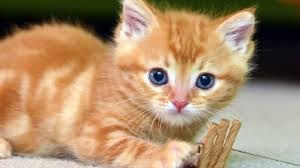

In [ ]:
img = Image.open('images?q=tbn:ANd9GcRWXm9UTkw7HBGZePowaSnUGAHdFjHPvEs723ZuKW2ZD1dFHWAw')
img

In [ ]:
img.size


(300, 168)

In [ ]:
cat_img = cv2.resize(np.array(img), ( 1600,1598))
cat_img.shape

(1598, 1600, 3)

In [ ]:
is_cat(cat_img)

False

# Features
What we did above is that we used the raw pixels as the only characteristic of the cat. In other words __features__.

We saw features in the survey examples. Those were the questions ready available for __structured data__. But even then, we had to think of the transforms, how to combine quesitons, what to do with duplicate questions,...etc.

In addition, we had to think of the questions weights.

In the cat example of __unstructured data__, the problem of features choice become more clear. Also, we still have the question of weights choice. In the above example, we treated all pixles equally, __but are they?__

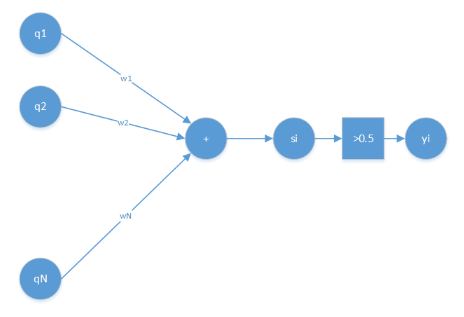

WE will later discover that the above pattern is called `neuron` or `Dense` or `Fully Connected Layer`.

# General pattern

We have two main steps we always perform in the 2 examples:

1. Get the features (questions, pixles), weighted with whatever weights
2. Decide on the score, which class?

In [ ]:
class Cat:
  def __init__(self, ref_cat_img):
    self.ref_cat_features = self.get_features(ref_cat_img)

  def is_cat(self, cat_img):
    features = self.get_features(cat_img)
    return self.compare_features(features, self.ref_cat_features)

  def get_features(self, cat_img):

    features = []# eyes, ears,....
    return features

  def compare_features(self, cat_img_features, ref_img_features):
    for feature1, feature2 in enumerate(zip(cat_img_features, ref_img_features)):
      if feature1 != feature2:
        return False
    return True


In [ ]:
cat = Cat(ref_img)
cat.is_cat(cat_img)

True

In [ ]:
!wget https://i.pinimg.com/236x/6b/75/2c/6b752c1cf649066ded40c84eb1915950--ginger-kitten-ginger-cats.jpg

--2021-03-26 08:03:08--  https://i.pinimg.com/236x/6b/75/2c/6b752c1cf649066ded40c84eb1915950--ginger-kitten-ginger-cats.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.18.15.176, 104.18.14.176, 2a02:26f0:ce:2b3::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.18.15.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15313 (15K) [image/jpeg]
Saving to: ‘6b752c1cf649066ded40c84eb1915950--ginger-kitten-ginger-cats.jpg’

6b752c1cf649066ded4 100%[===================>]  14.95K  --.-KB/s    in 0s      

2021-03-26 08:03:08 (33.3 MB/s) - ‘6b752c1cf649066ded40c84eb1915950--ginger-kitten-ginger-cats.jpg’ saved [15313/15313]



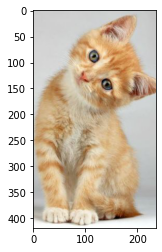

In [ ]:
img2 = image.load_img('6b752c1cf649066ded40c84eb1915950--ginger-kitten-ginger-cats.jpg')
plt.imshow(img2)

__Pixels are bad features__

In all cases, pixels are not enough. We need morphology (translation, rotation, colr, light/illumination,...etc) invariant features!

# KNN

Instead of one `ref_cat_img`, can we use many?

If we have lots of cat imgs, we have more and more examples. We could compare to all to them, and say pick the top K relevant cat images. Those are likely to be of the same cat type.

1- But how to decide on _relevance_? How to decide two cat images are _simiar_? __We need simialrity metric__


2- On what basis we compare cat imgs? What values of the cat image we use for similarity?



# Can we use better features?
Say edges?

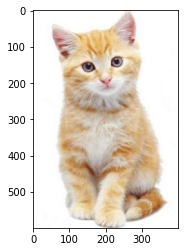

In [ ]:
img_bgr = cv2.imread('cat.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


Edges are clearer in gray scale

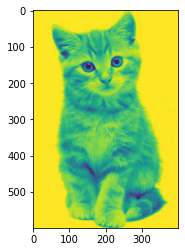

In [ ]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (21, 21), 0)
plt.imshow(gray)

In [ ]:
gray.shape

(600, 400)

We need to use the proper color map

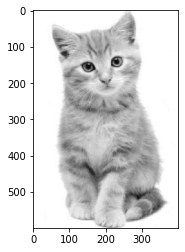

In [ ]:
plt.imshow(gray, cmap='gray')

Now, edges are more clear in BW images

How to get BW?

Put threshold.

That threshold can same everywhere

Or it can adapt based on the intensity of the region

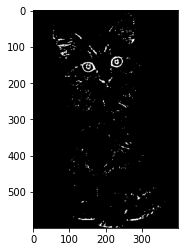

In [ ]:
thresh = cv2.adaptiveThreshold(gray,
                               255.0,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 19, 20)
plt.imshow(thresh, cmap='gray')

We can move over this image, and look for the places with change in intensity (0,1,0). OR in 2D: [[0,1,0],[0,1,0],[0,1,0]].

The is called _filtering_

The best edge filter is Canny:

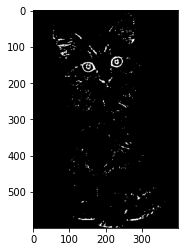

In [ ]:
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh, cmap='gray')

Now, let's group points withing regions, by _dilating_ or emphasising them

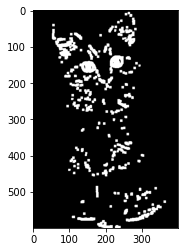

In [ ]:
kernel_sz = 3
iterations = 2
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_sz, kernel_sz))
dilated = cv2.dilate(edges, structuringElement, iterations=iterations)
plt.imshow(dilated, cmap='gray')

We can find structures or around groups of pixels or clusters. These are called contours:

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
contours


[array([[[238, 596]],
 
        [[237, 597]],
 
        [[238, 598]],
 
        [[239, 598]],
 
        [[238, 598]],
 
        [[237, 597]],
 
        [[238, 596]],
 
        [[239, 596]]], dtype=int32), array([[[217, 596]],
 
        [[217, 597]],
 
        [[216, 598]],
 
        [[215, 598]],
 
        [[214, 598]],
 
        [[213, 598]],
 
        [[212, 598]],
 
        [[211, 598]],
 
        [[210, 598]],
 
        [[209, 598]],
 
        [[208, 598]],
 
        [[207, 598]],
 
        [[206, 598]],
 
        [[207, 598]],
 
        [[208, 598]],
 
        [[209, 598]],
 
        [[210, 598]],
 
        [[211, 598]],
 
        [[212, 598]],
 
        [[213, 598]],
 
        [[214, 598]],
 
        [[215, 598]],
 
        [[216, 598]],
 
        [[217, 598]],
 
        [[217, 597]]], dtype=int32), array([[[194, 596]],
 
        [[195, 596]],
 
        [[196, 597]],
 
        [[197, 597]],
 
        [[198, 597]],
 
        [[199, 597]],
 
        [[200, 597]],
 
        [[201, 5

In [ ]:
len(contours)

456

In [ ]:
cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

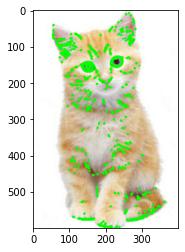

In [ ]:
plt.imshow(img_rgb)

# Layers of features
Notice how we can have multiple levels of features:
- Pixels
- Gray pixles
- Threshold pixels
- Edges
- Contours

Every level is made of the previous!

Contours are groups of pixels in the edged image

In ALL of the above __we__ designed the features pipeline! This is machine learning. In Deep learning, the choice of features is __learnable__.